<a href="https://colab.research.google.com/github/12sam158/tf2019/blob/master/Sam_Pollinger_TMDB_Pred_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [226]:
#Sam Pollinger 
#import data files from repository
!wget https://raw.githubusercontent.com/12sam158/tf2019/master/test.csv
!wget https://raw.githubusercontent.com/12sam158/tf2019/master/train.csv
!wget https://raw.githubusercontent.com/12sam158/tf2019/master/sample_submission.csv
      

--2019-04-29 16:42:37--  https://raw.githubusercontent.com/12sam158/tf2019/master/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41864158 (40M) [text/plain]
Saving to: ‘test.csv.3’

test.csv.3          100%[===================>]  39.92M   181MB/s    in 0.2s    

2019-04-29 16:42:38 (181 MB/s) - ‘test.csv.3’ saved [41864158/41864158]

--2019-04-29 16:42:38--  https://raw.githubusercontent.com/12sam158/tf2019/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28308747 (27M) [text/plain]
Saving to: ‘train.csv.3’

train.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
#Create pandas dataframes for test, train and submission
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss=pd.read_csv('sample_submission.csv')

In [229]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [230]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [231]:
train.shape

(3000, 23)

In [232]:
test.shape

(4398, 22)

In [233]:
train.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [234]:
test.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482241,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [235]:
# identify areas of high null values 
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [236]:
test.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

# Distribution Plots

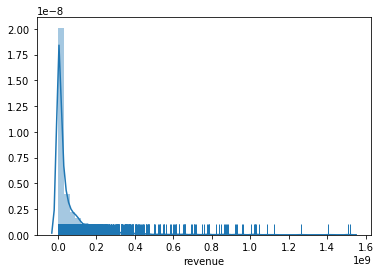

In [237]:
# Multiple distribution plots for main numeric columns, determines if log transform is necessary 
sns.distplot(train['revenue'], kde=True, rug=True)

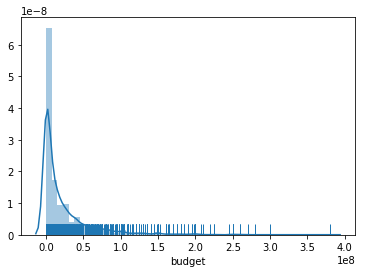

In [238]:
sns.distplot(train['budget'], kde=True, rug=True)

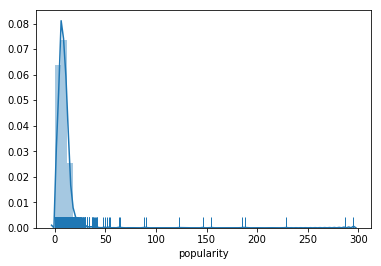

In [239]:
sns.distplot(train['popularity'], kde=True, rug=True)

# Data Cleaning

In [0]:
# Break MM/DD/YY column into individual day, month and year columns
train['release_month']=pd.to_datetime(train['release_date']).dt.month
train['release_day']=pd.to_datetime(train['release_date']).dt.day
train['release_year']=pd.to_datetime(train['release_date']).dt.year

test['release_month']=pd.to_datetime(test['release_date']).dt.month
test['release_day']=pd.to_datetime(test['release_date']).dt.day
test['release_year']=pd.to_datetime(test['release_date']).dt.year


In [0]:
# Assitance from this kernelhttps://www.kaggle.com/somang1418/eda-lgb-xgb-modelings-with-a-cute-panda-meme 
# Fixes years changed to 4 year form that are above 2019
train['release_year']=np.where(train['release_year'] > 2019, train['release_year']-100, train['release_year'])
test['release_year']=np.where(test['release_year'] > 2019, test['release_year']-100, test['release_year'])

In [0]:
# Create day of the week column
train['release_dow']=pd.to_datetime(train['release_date']).dt.dayofweek
test['release_dow']=pd.to_datetime(test['release_date']).dt.dayofweek

In [0]:
#Collection films have many nulls, but generate higher revenue. 
#Column determines presense of being part of collection
train['part_of_collection']=0
train.loc[train['belongs_to_collection'].isnull()==False, 'part_of_collection']=1

test['part_of_collection']=0
test.loc[test['belongs_to_collection'].isnull()==False, 'part_of_collection']=1

In [0]:
#Films with web homepage also have many nulls, but generate higher revenue
#Column determines presense of having a web homepage
train['has_homepage']=0
train.loc[train['homepage'].isnull()==False, 'has_homeage']=1

test['has_homepage']=0
test.loc[test['homepage'].isnull()==False, 'has_homepage']=1

In [0]:
#Determines if the film has an associated tagline
train['has_tagline']=0
train.loc[train['tagline'].isnull()==False, 'has_tagline']=1

test['has_tagline']=0
test.loc[test['tagline'].isnull()==False, 'has_tagline']=1

In [0]:
#Budget and popularity is skewed so log transform is applied
train['log_budget']=train['budget'].apply(np.log1p)
test['log_budget']=test['budget'].apply(np.log1p)

train['log_popularity']=train['popularity'].apply(np.log1p)
test['log_popularity']=test['popularity'].apply(np.log1p)

train['log_revenue']=train['revenue'].apply(np.log1p)

In [0]:
# Observe amount of releases per year 
year=pd.DataFrame(train['release_year'])

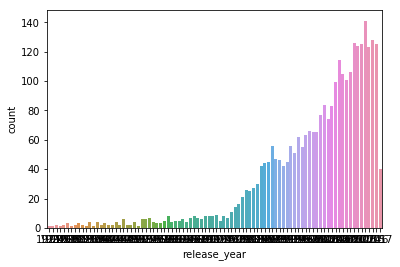

In [248]:
sns.countplot(x="release_year", data=year)

# Genre Feature Creation

## This was developed by Kaggle user kamalchhirang in their kernel.

In [249]:
#From this kernel https://www.kaggle.com/kamalchhirang/eda-feature-engineering-lgb-xgb-cat
#Function pulls genres out of text form and transforms data to binary columns
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d
train = train
train['genres'] = train['genres'].map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
genres = train.genres.str.get_dummies(sep=',')
train = pd.concat([train, genres], axis=1, sort=False)
print("Action Genres Movie           ", train[train.Action == 1].shape[0])
print("Adventure Genres Movie        ", train[train.Adventure == 1].shape[0])
print("Animation Genres Movie        ", train[train.Animation == 1].shape[0])
print("Comedy Genres Movie           ", train[train.Comedy == 1].shape[0])
print("Crime Genres Movie            ", train[train.Crime == 1].shape[0])
print("Documentary Genres Movie      ", train[train.Documentary == 1].shape[0])
print("Drama Genres Movie            ", train[train.Drama == 1].shape[0])
print("Family Genres Movie           ", train[train.Family == 1].shape[0])
print("Fantasy Genres Movie          ", train[train.Fantasy == 1].shape[0])
print("Foreign Genres Movie          ", train[train.Foreign == 1].shape[0])
print("History Genres Movie          ", train[train.History == 1].shape[0])
print("Music Genres Movie            ", train[train.Music == 1].shape[0])
print("Mystery Genres Movie          ", train[train.Mystery == 1].shape[0])
print("Romance Genres Movie          ", train[train.Romance == 1].shape[0])
print("Science Fiction Genres Movie  ", train[train['Science Fiction'] == 1].shape[0])
print("TV Movie Genres Movie         ", train[train['TV Movie'] == 1].shape[0])
print("Thriller Genres Movie         ", train[train.Thriller == 1].shape[0])
print("War Genres Movie              ", train[train.War == 1].shape[0])
print("Western Genres Movie          ", train[train.Western == 1].shape[0])

Action Genres Movie            741
Adventure Genres Movie         439
Animation Genres Movie         141
Comedy Genres Movie            1028
Crime Genres Movie             469
Documentary Genres Movie       87
Drama Genres Movie             1531
Family Genres Movie            260
Fantasy Genres Movie           232
Foreign Genres Movie           31
History Genres Movie           132
Music Genres Movie             100
Mystery Genres Movie           225
Romance Genres Movie           571
Science Fiction Genres Movie   290
TV Movie Genres Movie          1
Thriller Genres Movie          789
War Genres Movie               100
Western Genres Movie           43


In [250]:
test = test
test['genres'] = test['genres'].map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
genres = test.genres.str.get_dummies(sep=',')
test = pd.concat([test, genres], axis=1, sort=False)
print("Action Genres Movie           ", test[test.Action == 1].shape[0])
print("Adventure Genres Movie        ", test[test.Adventure == 1].shape[0])
print("Animation Genres Movie        ", test[test.Animation == 1].shape[0])
print("Comedy Genres Movie           ", test[test.Comedy == 1].shape[0])
print("Crime Genres Movie            ", test[test.Crime == 1].shape[0])
print("Documentary Genres Movie      ", test[test.Documentary == 1].shape[0])
print("Drama Genres Movie            ", test[test.Drama == 1].shape[0])
print("Family Genres Movie           ", test[test.Family == 1].shape[0])
print("Fantasy Genres Movie          ", test[test.Fantasy == 1].shape[0])
print("Foreign Genres Movie          ", test[test.Foreign == 1].shape[0])
print("History Genres Movie          ", test[test.History == 1].shape[0])
print("Music Genres Movie            ", test[test.Music == 1].shape[0])
print("Mystery Genres Movie          ", test[test.Mystery == 1].shape[0])
print("Romance Genres Movie          ", test[test.Romance == 1].shape[0])
print("Science Fiction Genres Movie  ", test[test['Science Fiction'] == 1].shape[0])
print("TV Movie Genres Movie          0")
print("Thriller Genres Movie         ", test[test.Thriller == 1].shape[0])
print("War Genres Movie              ", test[test.War == 1].shape[0])
print("Western Genres Movie          ", test[test.Western == 1].shape[0])

Action Genres Movie            994
Adventure Genres Movie         677
Animation Genres Movie         241
Comedy Genres Movie            1577
Crime Genres Movie             615
Documentary Genres Movie       134
Drama Genres Movie             2145
Family Genres Movie            415
Fantasy Genres Movie           396
Foreign Genres Movie           53
History Genres Movie           163
Music Genres Movie             167
Mystery Genres Movie           325
Romance Genres Movie           864
Science Fiction Genres Movie   454
TV Movie Genres Movie          0
Thriller Genres Movie          1080
War Genres Movie               143
Western Genres Movie           74


# Final Data table

In [251]:
#Create final data tables for models, including all necessary columns
train_new=train[['id', 'log_budget', 'part_of_collection', 'has_homepage', 
                 'has_tagline', 'log_popularity', 'release_month', 'release_day', 
                 'release_year', 'release_dow', 'Action','Adventure','Animation',
                 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                 'Foreign', 'History', 'Music',  'Mystery', 'Romance', 'Science Fiction', 
                 'TV Movie', 'Thriller', 'War', 'Western', 'log_revenue']]
train_new.head()

,id,log_budget,part_of_collection,has_homepage,has_tagline,log_popularity,release_month,release_day,release_year,release_dow,...,History,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,log_revenue
0,1,16.454568,1,0,1,2.024905,2,20,2015,4,...,0,0,0,0,0,0,0,0,0,16.326300
1,2,17.504390,1,0,1,2.224504,8,6,2004,4,...,0,0,0,1,0,0,0,0,0,18.370959
2,3,15.009433,0,0,1,4.178992,10,10,2014,4,...,0,0,0,0,0,0,0,0,0,16.387512
3,4,13.997833,0,0,0,1.429099,3,9,2012,4,...,0,0,0,0,0,0,1,0,0,16.588099
4,5,0.000000,0,0,0,0.764570,2,5,2009,3,...,0,0,0,0,0,0,1,0,0,15.182615


In [0]:
test_new=test[['id', 'log_budget', 'log_popularity','part_of_collection', 
               'has_homepage','has_tagline', 'release_month', 'release_day', 
               'release_year', 'release_dow', 'Action','Adventure','Animation',
                 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
               'Foreign', 'History', 'Music',  'Mystery', 'Romance', 'Science Fiction', 
                  'Thriller', 'War', 'Western',]]

# Linear Regression

In [0]:
#Create train test split
y=train_new['log_revenue']

X=train_new.drop(['log_revenue'], axis=1)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1000)
#Random state was increased from the naive model split

In [254]:
print(X.shape, y.shape)

(3000, 29) (3000,)


In [255]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2100, 29) (900, 29) (2100,) (900,)


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm=LinearRegression()

In [257]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
#Create the prediction and revert the revenue from log form
prediction=lm.predict(X_test)
pred_exp=np.expm1(prediction)

In [259]:
print('R2 for Train', lm.score(X_train, y_train))
print('R2 for test', lm.score(X_test, y_test))

R2 for Train 0.4498655208654167
R2 for test 0.39877503295978733


In [0]:
sub=pd.DataFrame({"id": X_test.id, "Revenue":pred_exp})
sub.to_csv("linear_sol.csv", index=False)

# Lasso Regression

In [0]:
from sklearn.linear_model import LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [262]:
#Running lasso on a variety of common alphas
L=LassoCV(alphas = [10,  1, 0.1, 0.01, 0.001]).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
#create the prediction and revert the revenue from log form
LP=L.predict(X_test)
LPexp=np.expm1(LP)

In [264]:
print("R2 Score:", L.score(X_train, y_train))
print("R2 Score:", L.score(X_test, y_test))

R2 Score: 0.44583317994359084
R2 Score: 0.3970606270457422


In [0]:
sub_L=pd.DataFrame({"id": X_test.id, "Revenue":LPexp})
sub_L.to_csv("lasso_sol.csv", index=False)

# Ridge Regressions

In [0]:
from sklearn.linear_model import Ridge, RidgeCV

In [0]:
#Ran on a variety of common ridge alphas
R=RidgeCV(alphas=[100, 75, 50, 25, 10, 1, 0.1]).fit(X_train, y_train)

In [0]:
#create the prediction and revert the revenue from log form
RP=R.predict(X_test)
RPexp=np.expm1(RP)

In [269]:
print("R2 Score:", R.score(X_train, y_train))
print("R2 Score:", R.score(X_test, y_test))

R2 Score: 0.447502956459195
R2 Score: 0.39820912766250516


In [0]:
sub_R=pd.DataFrame({"id": X_test.id, "Revenue":RPexp})
sub_R.to_csv('ridge_sol.csv', index=False)